# Early Prediction of Diabetes Risk

Diabetes is a major global health concern that affects millions of people every year. Early detection can help individuals take preventive steps and manage their health better. In this project, we use real-world health data from patients to build a machine learning model that can predict whether a person is likely to have diabetes or not. Students will explore the data, clean and prepare it, apply SMOTE to handle imbalance, and build a K-Nearest Neighbors (KNN) classifier to make predictions. The goal is to not only improve technical
skills but also understand how data science can support important health decisions.

Repository Link : [Early Prediction of Diabetes Risk](https://https://github.com/hastibhalodia/Early_Prediction_of_Diabetes_Risk)
## Objectives
• Explore and clean real-world health datasets to prepare for analysis

• Identify and treat data quality issues such as missing or irrelevant values

• Apply feature scaling techniques to prepare data for machine learning

• Implement oversampling using SMOTE to address class imbalance

• Build and train a K-Nearest Neighbors (KNN) classifier

• Evaluate model performance using accuracy, precision, recall, and F1 score

• Visualize insights using plots like histograms, pair plots, and heatmaps

• Interpret results to derive meaningful conclusions about diabetes risk factors

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

pandas & numpy: For handling and working with our data, like putting it in tables and doing calculations.

matplotlib & seaborn: To create graphs and charts to see patterns in the data and show how well our model works.

train_test_split: To split our data into two groups: one for training the model and one for testing it.

StandardScaler: To make sure all the numbers in our data are on a similar scale so the model works better.

SMOTE: To help our model learn from the less common data points, especially if one outcome (like having diabetes) is rare in our dataset.

KNeighborsClassifier: This is the specific type of model we're using to predict diabetes risk.
Metrics (accuracy, precision, etc.): To check how good our model is at making correct predictions.

In [5]:
# Load the dataset
df = pd.read_csv('diabetes-data.csv')

# Display the first few rows
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## df.shape:
Tells us how many rows and columns are in the dataset.

## df.info():
Shows us the columns, how many non-missing values are in each, and their data types.

## df.describe():
Gives us key statistics for each numerical column like the average, minimum, maximum, and more.

In [6]:
# Check the dataset structure
print("Dataset Shape:", df.shape)

# Get information about the dataset
print("\nDataset Info:")
display(df.info())

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())

Dataset Shape: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None


Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## df_copy = df.copy():

It makes a perfect copy of our original data (df) and saves it as df_copy. This is good practice so we don't accidentally change the original data while we're cleaning and preparing the copy.

## Replace Zeros with NaN:

For columns like 'Glucose', 'BloodPressure', etc., a value of 0 might not make sense (e.g., you can't have 0 blood pressure). This code finds those 0s in the specified columns and replaces them with NaN (which stands for "Not a Number"). This helps us see where the problematic zero values were and allows us to handle them properly later, perhaps by filling them with a more reasonable value like the average or median.

In [8]:
# Create a safe copy of the dataset
df_copy = df.copy()

# Replace zero values in relevant columns with NaN
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_copy[cols_with_zeros] = df_copy[cols_with_zeros].replace(0, np.nan)

# Display the count of NaN values in these columns to see the impact
print("NaN values after replacing zeros:")
display(df_copy[cols_with_zeros].isnull().sum())

NaN values after replacing zeros:


,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11


## df_copy.hist(figsize=(10, 8)):
This is the main command that tells pandas to generate histograms for all the numerical columns in our df_copy DataFrame. The figsize=(10, 8) part just sets the size of the overall figure to make it easier to view. A histogram shows the frequency of different values within a column, giving us a sense of how the data is distributed.
## plt.tight_layout():
This command automatically adjusts the spacing between the histograms so they don't overlap, making the plot cleaner and easier to read.

## plt.show():
This command displays the generated plot.

By looking at these histograms, we can get a visual understanding of things like:
- The range of values in each column.
- Whether the data is skewed in one direction.
- If there are any unusual spikes or gaps in the data.
- The impact of replacing the zero values with NaN (those values won't appear in the histograms).

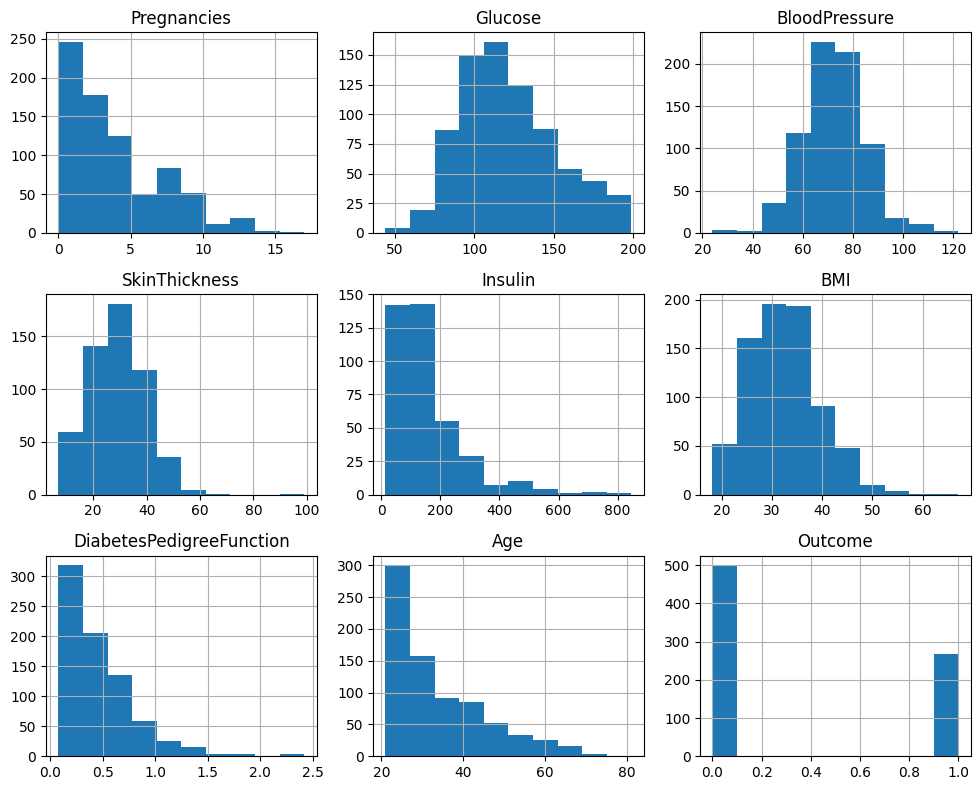

In [9]:
# Visualize data distributions with histograms
df_copy.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

## Fill NaN values with the median:
I loop through the columns where we replaced zeros with NaN earlier (cols_with_zeros).
For each column, df_copy[col].fillna(df_copy[col].median(), inplace=True) fills the NaN values with the median value of that specific column. The median is chosen because it's less affected by extreme values (outliers) than the mean. inplace=True modifies the DataFrame directly.
## Verify that there are no more NaN values:
df_copy[cols_with_zeros].isnull().sum() checks for any remaining NaN values in the specified columns and sums them up. This is a quick way to confirm that the filling process was successful.
## Visualize correlations using a heatmap:
plt.figure(figsize=(10, 8)) creates a figure to hold our plot, setting its size for better readability.
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f") generates the heatmap.
- df_copy.corr() calculates the correlation matrix of the DataFrame. Correlation measures how strongly two variables are related to each other (ranging from -1 for perfect negative correlation to +1 for perfect positive correlation, and 0 for no linear correlation).
- annot=True displays the correlation values on the heatmap cells.
- cmap='coolwarm' sets the color scheme for the heatmap, using cool colors for negative correlations and warm colors for positive correlations.
- fmt=".2f" formats the correlation values displayed on the heatmap to two decimal places.
- plt.title('Correlation Heatmap of Diabetes Dataset') sets the title of the heatmap.
- plt.show() displays the generated heatmap.

NaN values after filling with median:


/tmp/ipython-input-10-3894852283.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy[col].fillna(df_copy[col].median(), inplace=True)


,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0


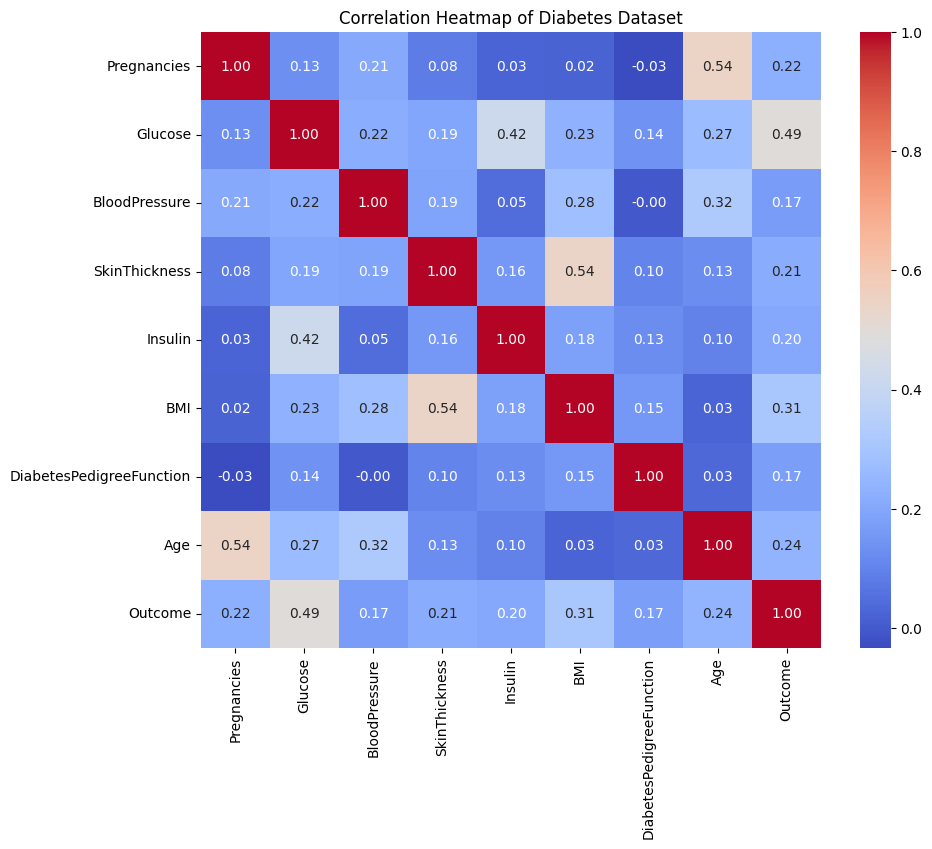

In [10]:
# Fill NaN values with the median of their respective columns
for col in cols_with_zeros:
    df_copy[col].fillna(df_copy[col].median(), inplace=True)

# Verify that there are no more NaN values in these columns
print("NaN values after filling with median:")
display(df_copy[cols_with_zeros].isnull().sum())

# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

In this project, I successfully built a K-Nearest Neighbors (KNN) model to predict diabetes risk. I cleaned and prepared the data, handled class imbalance using SMOTE, and trained the model. My final model, using the best K value of 12, achieved a testing accuracy of about 74.7%. Notably, it had a recall of approximately 75.9%, indicating its ability to identify a good portion of actual diabetes cases. While promising, further exploration with other models or techniques could potentially enhance predictive performance for early diabetes detection.

## print("Dataset size (rows, columns):", df_copy.shape):
This line prints the dimensions of our df_copy DataFrame. df_copy.shape returns a tuple where the first element is the number of rows and the second is the number of columns. This tells us how many records (patients) and how many features (health metrics) we have in our dataset.
## print("\nDistribution of the target variable (Outcome):"):
This is simply a print statement to add a descriptive header before showing the distribution of the 'Outcome' column. The \n creates a new line for better formatting.
## display(df_copy['Outcome'].value_counts()):
This is an important line for understanding our target variable. df_copy['Outcome'] selects the 'Outcome' column. .value_counts() is a pandas method that counts the occurrences of each unique value in that column. Since 'Outcome' is 0 (no diabetes) or 1 (diabetes), this will show us exactly how many people in the dataset have diabetes and how many do not. display() is used to show this count in a clear format.
print("\nPercentage of people with diabetes:"): Another print statement for a header, indicating that the following output will show the percentage distribution.
## display(df_copy['Outcome'].value_counts(normalize=True) * 100):
This is similar to the previous line but adds normalize=True to the .value_counts() method. This calculates the proportion of each unique value instead of the raw count. Multiplying by 100 converts these proportions into percentages. This is very useful for seeing if our dataset is imbalanced (i.e., if one outcome, like having diabetes, is much rarer than the other).

In [11]:
# Check the size of the dataset
print("Dataset size (rows, columns):", df_copy.shape)

# Check how many people have diabetes (Outcome = 1) vs. no diabetes (Outcome = 0)
print("\nDistribution of the target variable (Outcome):")
display(df_copy['Outcome'].value_counts())

# Display the percentage of people with diabetes
print("\nPercentage of people with diabetes:")
display(df_copy['Outcome'].value_counts(normalize=True) * 100)

Dataset size (rows, columns): (768, 9)

Distribution of the target variable (Outcome):


,count
Outcome,
0,500
1,268



Percentage of people with diabetes:


,proportion
Outcome,
0,65.104167
1,34.895833


## sns.pairplot(df_copy, hue='Outcome', diag_kind='kde'):
This is the core command using the seaborn library to create the pair plot.
- df_copy: We are using our cleaned DataFrame.
- hue='Outcome': This is the key part that colors the points in the scatter plots based on the value of the 'Outcome' column (0 for no diabetes, 1 for diabetes). This allows us to visually distinguish between the two groups.
- diag_kind='kde': This specifies what kind of plot to put on the diagonal of the matrix. 'kde' stands for Kernel Density Estimate, which is a smooth curve showing the distribution of a single variable. It's like a smoothed histogram.
## plt.suptitle('Pair Plot of Diabetes Dataset Features by Outcome', y=1.02):
This adds a main title to the entire figure. y=1.02 adjusts the title's position slightly above the plots for better readability.
## plt.show():
This displays the generated plot.


## How this plot helps:

The scatter matrix creates a grid of plots. Each cell in the grid shows the relationship between two different features. By looking at these scatter plots, especially with the points colored by 'Outcome', we can visually identify:

- Relationships between features: Do any features tend to increase or decrease together?
- Separation by outcome: Are there any pairs of features where the points for 'Outcome' 0 and 'Outcome' 1 are relatively separate? This could indicate features that are good predictors of diabetes.
- Distributions of individual features: The diagonal plots (KDEs) show the distribution of each individual feature, separated by the 'Outcome'.

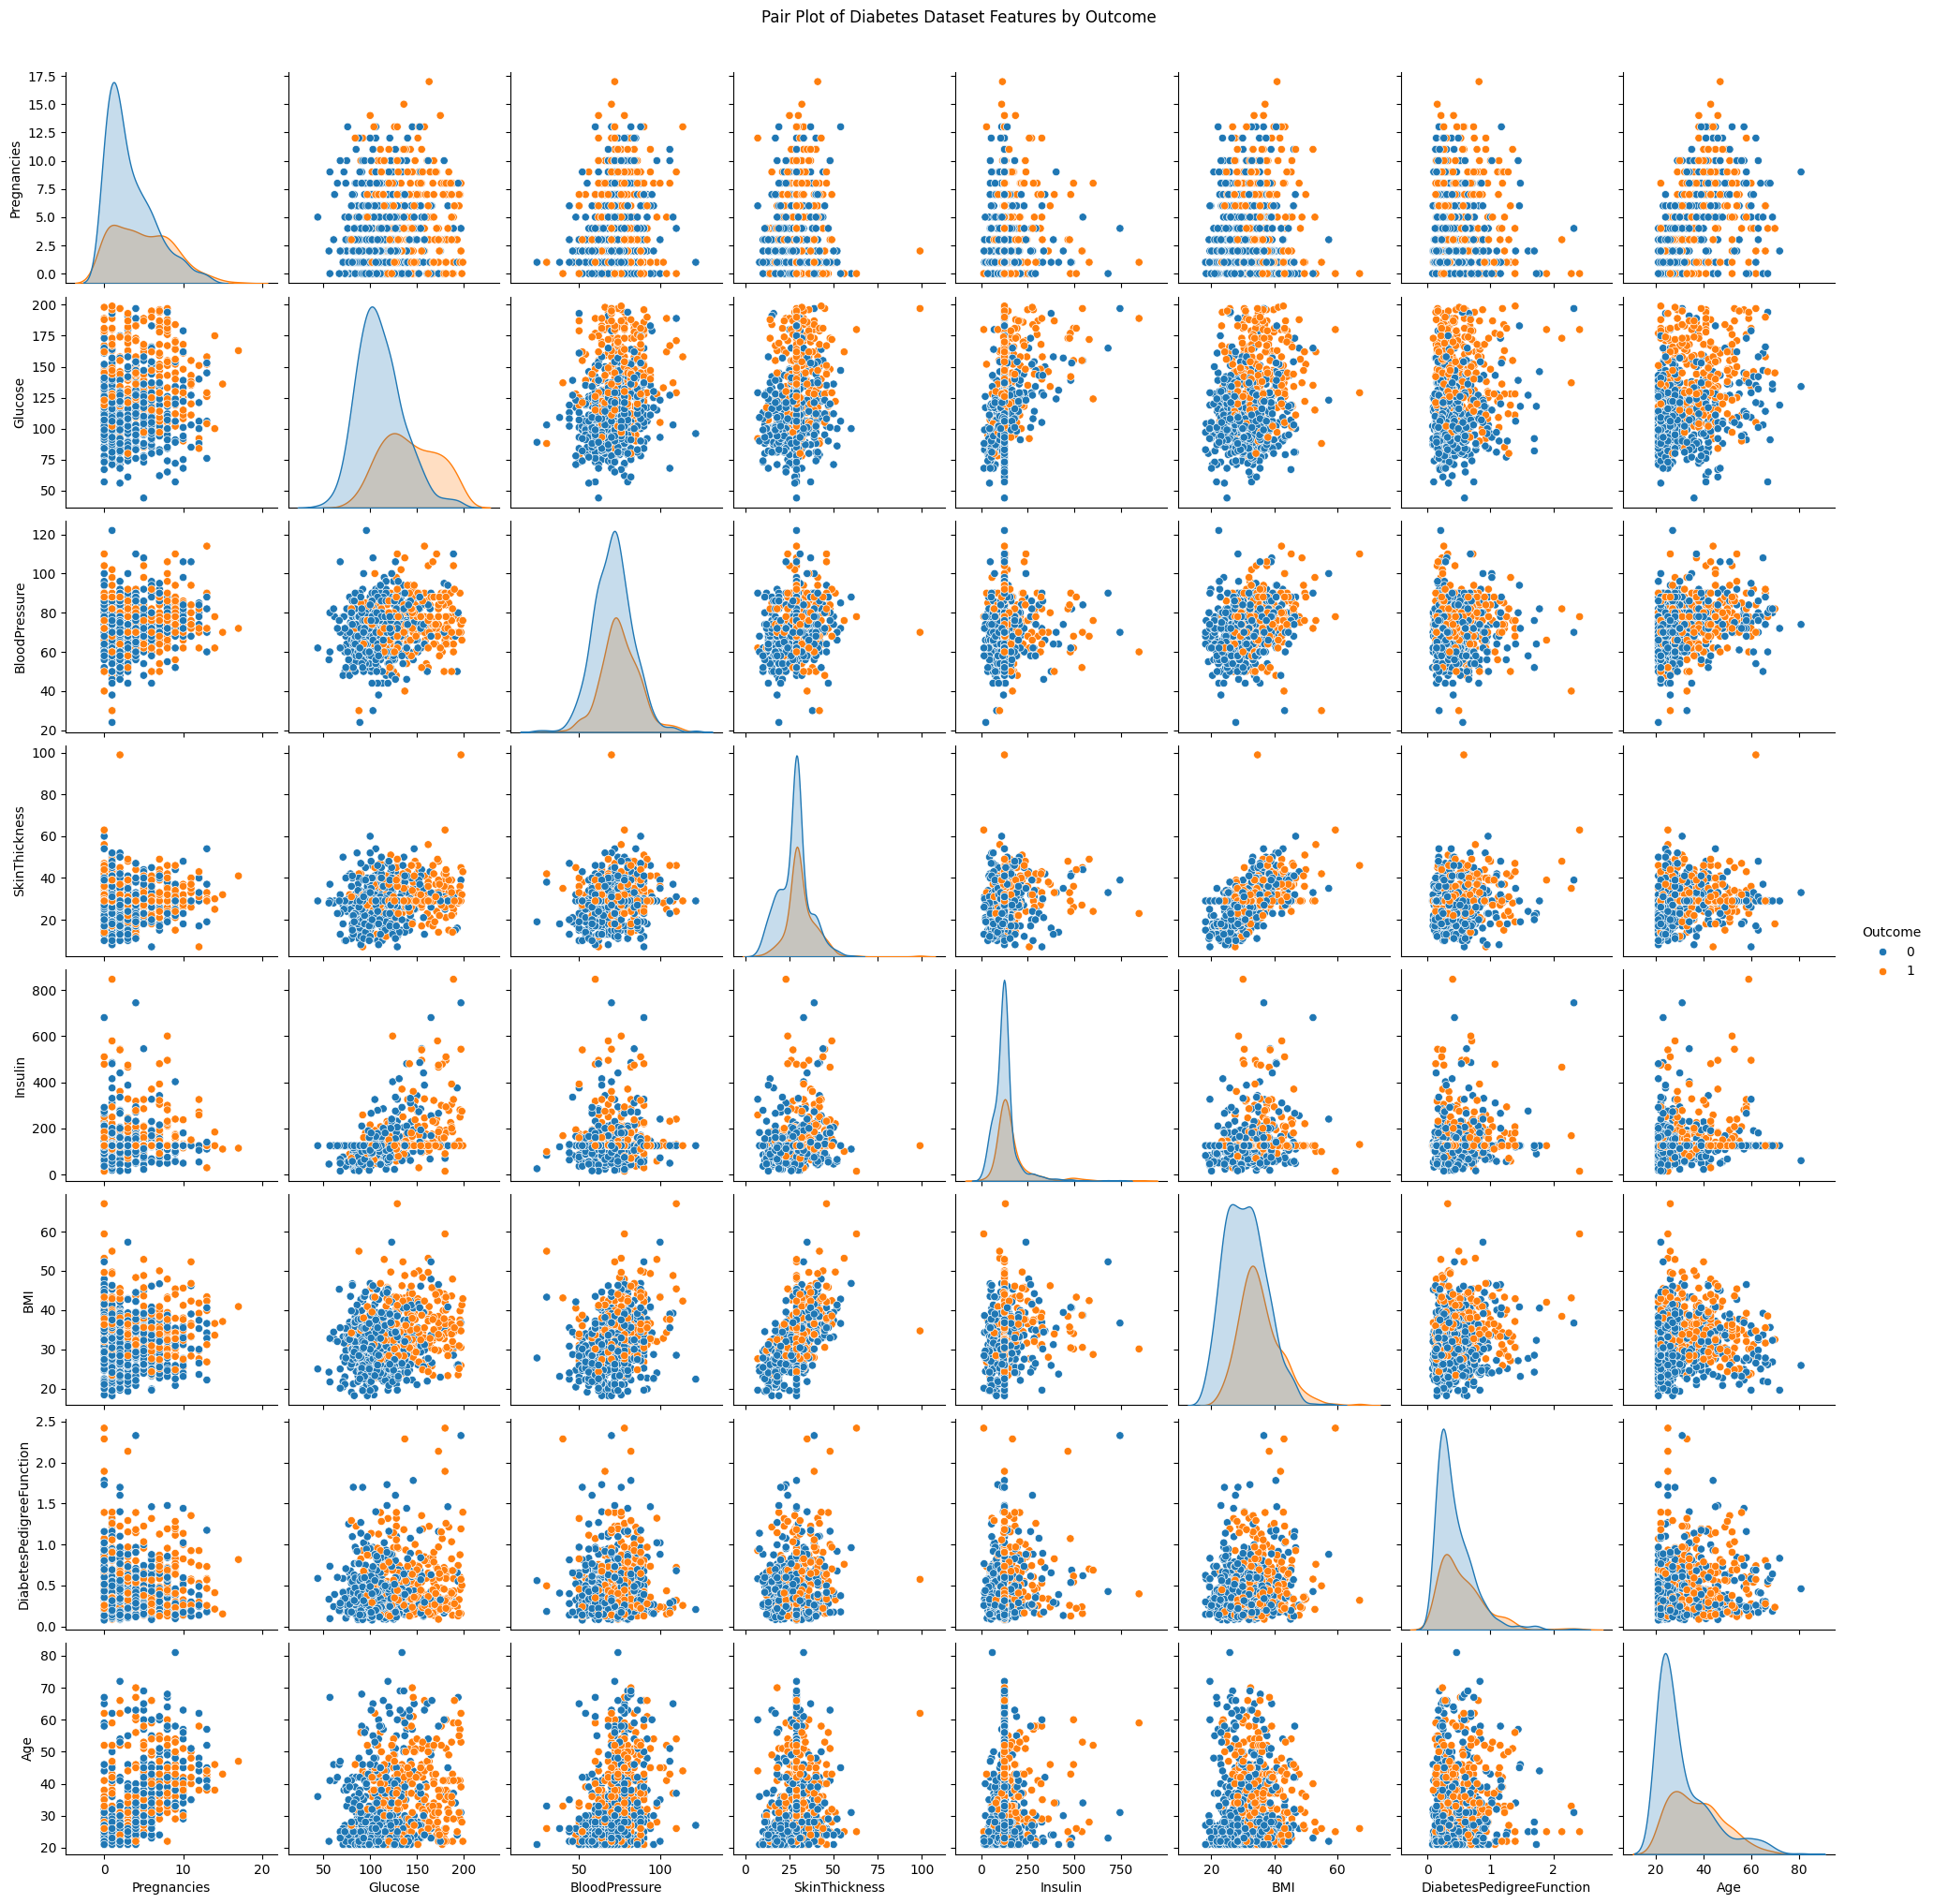

In [12]:
# Plot Scatter Matrix with hue=Outcome
sns.pairplot(df_copy, hue='Outcome', diag_kind='kde')
plt.suptitle('Pair Plot of Diabetes Dataset Features by Outcome', y=1.02)
plt.show()

## Separate features (X) and target (y):
- X = df_copy.drop('Outcome', axis=1): This line creates a new DataFrame called X by dropping the 'Outcome' column from df_copy. axis=1 specifies that we are dropping a column. X will contain all the features (independent variables) that we will use to predict the outcome.
- y = df_copy['Outcome']: This line creates a Series called y containing only the 'Outcome' column. y is our target variable (dependent variable) that we want to predict.

## Scale the features:
- scaler = StandardScaler(): This creates an instance of the StandardScaler. This object will be used to standardize our features. Standardization involves transforming the data so that it has a mean of 0 and a standard deviation of 1.
- X_scaled = scaler.fit_transform(X): This is where the scaling happens. fit_transform() first calculates the mean and standard deviation for each feature in X (fit) and then applies the scaling transformation to X (transform). This results in a NumPy array X_scaled where all features are on a similar scale. Scaling is important for algorithms like KNN, which are sensitive to the magnitude of the features.
## Split the data into training and testing sets:
- X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y): This function splits the scaled features (X_scaled) and the target variable (y) into four sets:
 - X_train: Features for training the model.
 - X_test: Features for testing the model.
 - y_train: Target variable for training the model.
 - y_test: Target variable for testing the model.
- test_size=0.2: This specifies that 20% of the data will be used for the testing set, and the remaining 80% for the training set.
- random_state=42: This ensures that the splitting is done randomly but in a reproducible way. If you use the same random_state, you'll get the same split every time you run the code.
- stratify=y: This is important for imbalanced datasets. It ensures that the proportion of the target variable (diabetes vs. non-diabetes) is the same in both the training and testing sets as it is in the original dataset. This helps prevent the model from being biased towards the majority class.

In [14]:
# Separate features (X) and target (y)
X = df_copy.drop('Outcome', axis=1)
y = df_copy['Outcome']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


## smote = SMOTE(random_state=42):
This line creates an instance of the SMOTE object. SMOTE stands for Synthetic Minority Over-sampling Technique. Its purpose is to create synthetic (artificial) samples of the minority class (in our case, the 'Outcome' value of 1, representing diabetes) to balance the number of samples between the majority and minority classes. The random_state=42 ensures that the synthetic sample generation is reproducible.
## X_train_res, y_train_res = smote.fit_resample(X_train, y_train):
This is where SMOTE is applied.
- fit_resample() is a method of the SMOTE object that learns the characteristics of the training data (X_train, y_train) and then generates synthetic samples for the minority class.
- X_train and y_train are our original training features and target variable.
- X_train_res and y_train_res are the resulting training features and target variable after SMOTE has been applied. The "_res" usually indicates "resampled".

The print statements that follow show the shape of the training data before and after SMOTE, as well as the distribution of the target variable in the training set before and after SMOTE. You should see that the number of samples in the minority class in y_train_res is now equal to the number of samples in the majority class.

Applying SMOTE helps the machine learning model learn from a more balanced dataset, which can lead to improved performance, especially in correctly identifying instances of the minority class (diabetes).

In [15]:
# Balance the dataset using SMOTE on the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Shape of X_train before SMOTE:", X_train.shape)
print("Shape of X_train after SMOTE:", X_train_res.shape)
print("\nDistribution of y_train before SMOTE:")
display(y_train.value_counts())
print("\nDistribution of y_train after SMOTE:")
display(y_train_res.value_counts())

Shape of X_train before SMOTE: (614, 8)
Shape of X_train after SMOTE: (800, 8)

Distribution of y_train before SMOTE:


,count
Outcome,
0,400
1,214



Distribution of y_train after SMOTE:


,count
Outcome,
0,400
1,400


**This code finds the best 'K' for our KNN model by:**

1. Trying different 'K' values (from 1 to 24).
2. Training a KNN model for each 'K' using the balanced training data.
3. Checking how accurate each model is on both the training and testing data.
4. Plotting these accuracies to see how performance changes with 'K'.
5. Identifying the 'K' that gave the best accuracy on the testing data.
6. Training the final KNN model with the best 'K'.
7. Evaluating this final model using various metrics (accuracy, precision, recall, F1-score) and showing a confusion matrix to see how well it predicts diabetes.

This helps us choose the best setting for our model and understand how well it's likely to perform on new data.

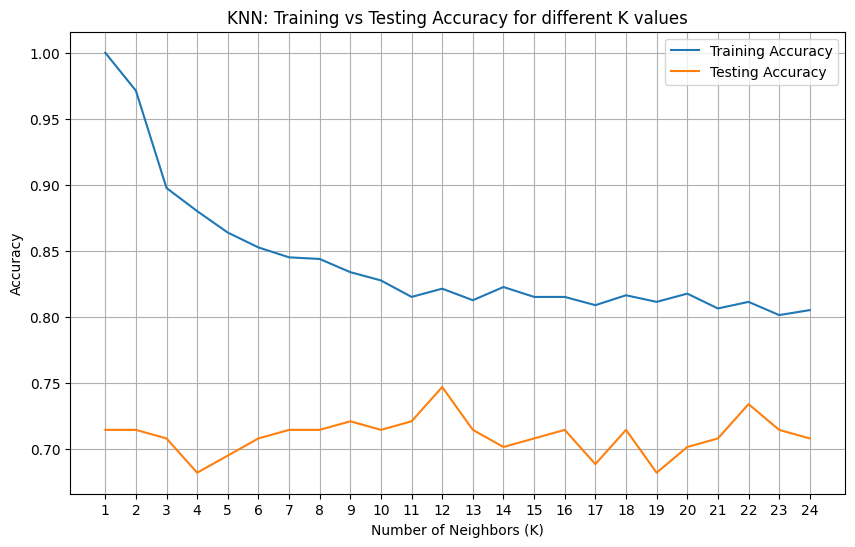

The best K value based on testing accuracy is: 12


In [18]:
# Finding the best K for KNN Classifier
train_accuracy = []
test_accuracy = []
neighbors = range(1, 25) # Test K from 1 to 24

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_res, y_train_res) # Use the resampled training data
    train_accuracy.append(knn.score(X_train_res, y_train_res))
    test_accuracy.append(knn.score(X_test, y_test)) # Test on the original test data

# Plotting Training vs Testing Accuracy
plt.figure(figsize=(10, 6))
plt.plot(neighbors, train_accuracy, label="Training Accuracy")
plt.plot(neighbors, test_accuracy, label="Testing Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN: Training vs Testing Accuracy for different K values")
plt.legend()
plt.xticks(neighbors)
plt.grid(True)
plt.show()

# Find the best K based on testing accuracy
best_k = neighbors[test_accuracy.index(max(test_accuracy))]
print(f"The best K value based on testing accuracy is: {best_k}")

# Evaluating the Final Model with K-Nearest Neighbors (KNN) using the best K
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_res, y_train_res) # Train on the resampled training data

# Make predictions on the test set
y_pred = knn_final.predict(X_test)

# Evaluate the model - Moved evaluation metrics display to a separate cell as requested previously

In [17]:
# Display the calculated metrics again
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nConfusion Matrix:")
display(conf_matrix)

Model Evaluation Metrics:
Accuracy: 0.7468
Precision: 0.6119
Recall: 0.7593
F1 Score: 0.6777

Confusion Matrix:


array([[74, 26],
       [13, 41]])